In [82]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scanpy.api as sc
import pandas as pd
import h5py
import os
import time
import itertools
from sklearn.decomposition import PCA
import pickle
import pandas as pd
from sklearn.linear_model import LinearRegression

import scanpy.api as sc
import sceb.data_loader as dl 
import sceb.scdd as sd

%matplotlib inline
%load_ext autoreload
%autoreload 2

from matplotlib import rcParams

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 10,
   'xtick.labelsize': 13,
   'ytick.labelsize': 13,
   'text.usetex': False,
   'text.usetex': False,
   }
rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
df_ercc = pd.read_csv('./ercc-info.txt', sep='\t')
df_ercc = df_ercc.iloc[:,[0,2]]
df_ercc = df_ercc.set_index(df_ercc.iloc[:,0])

In [292]:
input_folder = '/data/martin/single_cell/ERCC_data/ERCC'
input_folder_klein = '/data/martin/single_cell/klein'

In [293]:
df_klein = pd.read_csv(input_folder_klein + '/data', sep=',')
index_name = list(df_klein.index)
index_name = list(df_klein.iloc[:,0])
mat_klein_full = np.array(df_klein.iloc[:,1:].as_matrix(),dtype=int).T 
# df_ercc_klein = df_ercc.loc[index_name]
# ercc_lvl = np.array(df_ercc_klein.iloc[:,1], dtype=float)
# # ercc_lvl = ercc_lvl/10*1.1/1000*6.02*1e5
# ercc_lvl = ercc_lvl/5000
# ercc_lvl = ercc_lvl/1000
# ercc_lvl = ercc_lvl*6.02*1e5

In [299]:
temp = sp.sparse.csr_matrix(mat_klein_full)
data_klein_full = sc.AnnData(temp)
data_klein_full.var_names = index_name
sc.pp.filter_genes(data_klein_full,min_counts=0.01*data_klein_full.shape[0])
Nc,G,Nr,Nr_bar = sd.get_info(data_klein_full)

## Nc=953, G=24515, Nr=32485.73, Nr_bar=1.33


In [300]:
size_factor = sd.dd_size_factor(data_klein_full,verbose=False)
M_ml,M_dd = sd.dd_1d_moment(data_klein_full,verbose=False,size_factor=size_factor)
# ercc_lvl = M_ml[0,:]
var_dd = sd.M_to_var(M_dd)
var_ml = sd.M_to_var(M_ml)
cv_dd = sd.M_to_cv(M_dd)
cv_ml = sd.M_to_cv(M_ml)

In [301]:
temp_name = list(data_klein_full.var_names)
ind_ercc = np.zeros([len(temp_name)], dtype=bool)
for i_gene,gene in enumerate(temp_name):
    if 'ERCC-' in gene:
        ind_ercc[i_gene]=True

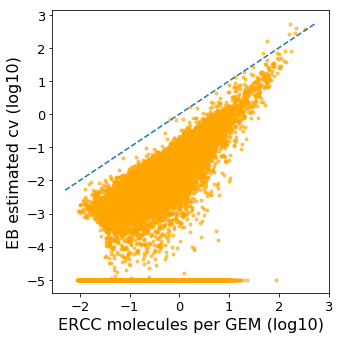

In [303]:
x_val = np.log10(M_dd[0])
# x_val = (M_dd[0])
# x_val = np.log10(ercc_lvl)
# x_val = (ercc_lvl)*0.076
y_val = np.log10(cv_dd)
y_val_ml = np.log10(cv_ml)
y_val = np.log10(var_dd)
y_val_ml = np.log10(var_ml)
# y_val = (var_dd)
# y_val_ml = (var_ml)
plt.figure(figsize=[5,5])
plt.scatter(x_val, y_val.clip(min=-5), color='orange', alpha=0.6, marker='.')
# plt.scatter(x_val[ind_ercc], y_val[ind_ercc].clip(min=-5), color='k', alpha=0.6, marker='+')
# plt.scatter(x_val, y_val_ml, color='steelblue', alpha=0.6, marker='.')
# plt.scatter(x_val[ind_ercc], y_val_ml[ind_ercc].clip(min=-5), color='r', alpha=0.6, marker='+')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# plt.plot([x_min, x_max], [-0.5*x_min, -0.5*x_max], linestyle='--')
plt.plot([x_min, x_max], [x_min, x_max], linestyle='--')
# plt.ylim([-1,50])
# plt.xlim([-1,50])
plt.xlabel('ERCC molecules per GEM (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
plt.show()

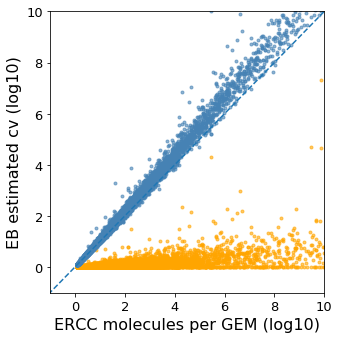

In [258]:
x_val = np.log10(M_dd[0])
x_val = (M_dd[0])
# x_val = np.log10(ercc_lvl)
# x_val = (ercc_lvl)*0.076
y_val = np.log10(cv_dd)
y_val_ml = np.log10(cv_ml)
y_val = np.log10(var_dd)
y_val_ml = np.log10(var_ml)
y_val = (var_dd)
y_val_ml = (var_ml)
plt.figure(figsize=[5,5])
plt.scatter(x_val, y_val.clip(min=-5), color='orange', alpha=0.6, marker='.')
# plt.scatter(x_val[ind_ercc], y_val[ind_ercc].clip(min=-5), color='k', alpha=0.6, marker='+')
plt.scatter(x_val, y_val_ml, color='steelblue', alpha=0.6, marker='.')
# plt.scatter(x_val[ind_ercc], y_val_ml[ind_ercc].clip(min=-5), color='r', alpha=0.6, marker='+')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# plt.plot([x_min, x_max], [-0.5*x_min, -0.5*x_max], linestyle='--')
plt.plot([x_min, x_max], [x_min, x_max], linestyle='--')
plt.ylim([-1,10])
plt.xlim([-1,10])
plt.xlabel('ERCC molecules per GEM (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
plt.show()

In [261]:
df_klein = pd.read_csv(input_folder + '/klein.txt', sep=' ')
index_name = list(df_klein.index)
mat_klein = np.array(df_klein.as_matrix()).T 
df_ercc_klein = df_ercc.loc[index_name]
ercc_lvl = np.array(df_ercc_klein.iloc[:,1], dtype=float)
# ercc_lvl = ercc_lvl/10*1.1/1000*6.02*1e5
ercc_lvl = ercc_lvl/5000
ercc_lvl = ercc_lvl/1000
ercc_lvl = ercc_lvl*6.02*1e5

In [262]:
temp = sp.sparse.csr_matrix(mat_klein)
data_klein = sc.AnnData(temp)
data_klein.var_names = index_name

In [263]:
size_factor = sd.dd_size_factor(data_klein,verbose=False)
M_ml,M_dd = sd.dd_1d_moment(data_klein,verbose=False,size_factor=size_factor)
# ercc_lvl = M_ml[0,:]
var_dd = sd.M_to_var(M_dd)
var_ml = sd.M_to_var(M_ml)
cv_dd = sd.M_to_cv(M_dd)
cv_ml = sd.M_to_cv(M_ml)

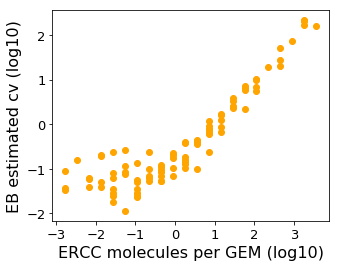

In [264]:
x_val = np.log10(ercc_lvl)
y_val = np.log10(mat_klein.mean(axis=0))
plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='orange')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.xlabel('ERCC molecules per GEM (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
plt.show()

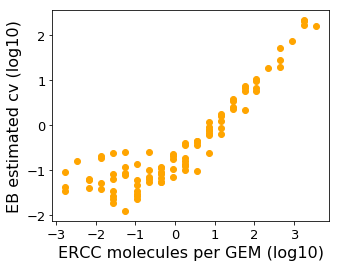

In [175]:
x_val = np.log10(ercc_lvl)
y_val = np.log10(M_dd[0])
plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='orange')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.xlabel('ERCC molecules per GEM (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
plt.show()

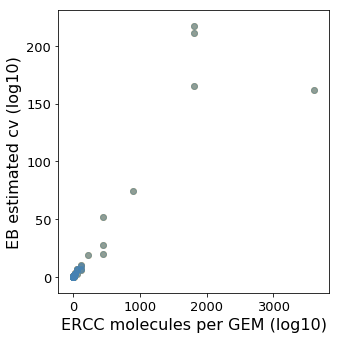

In [289]:
x_val = np.log10(M_dd[0])
x_val = (M_dd[0])
x_val = np.log10(ercc_lvl)
x_val = (ercc_lvl)
# x_val = (ercc_lvl)# *0.076
y_val = np.log10(cv_dd)
y_val_ml = np.log10(cv_ml)
y_val = np.log10(var_dd)
y_val_ml = np.log10(var_ml)

y_val = np.log10(M_dd[0])
y_val = (M_dd[0])
y_val_ml = np.log10(M_dd[0])
y_val_ml = (M_dd[0])
# y_val = (var_dd)
# y_val_ml = (var_ml)
plt.figure(figsize=[5,5])
plt.scatter(x_val, y_val.clip(min=-5), color='orange', alpha=0.6)
plt.scatter(x_val, y_val_ml, color='steelblue', alpha=0.6)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# plt.plot([x_min, x_max], [-0.5*x_min, -0.5*x_max], linestyle='--')
# plt.plot([x_min, x_max], [x_min, x_max], linestyle='--')
# plt.ylim([-1,500])
# plt.xlim([-1,4000])
plt.xlabel('ERCC molecules per GEM (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
plt.show()

In [281]:
y_max

485.59828276114627

In [84]:
## 
output_folder = '/home/martin/single_cell_eb/figures/figure_smfish'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
data = dl.load_10x_ercc_1k()
sc.pp.filter_genes(data,min_counts=0.1*data.shape[0])
Nc,G,Nr,Nr_bar = sd.get_info(data)
ercc_list = list(data.var_names) 
df = df_ercc.loc[ercc_list]
ercc_lvl = np.array(df.iloc[:,1], dtype=float)
# ercc_lvl = ercc_lvl/10*1.1/1000*6.02*1e5
ercc_lvl = ercc_lvl/10
ercc_lvl = ercc_lvl*1.1/1000
ercc_lvl = ercc_lvl*6.02*1e5
ercc_cv = 1/ np.sqrt(ercc_lvl)

## Nc=1015, G=65, Nr=10533.76, Nr_bar=162.06


/home/martin/single_cell_eb/sceb/data_loader.py:348: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
  data.smp_names = np.genfromtxt(filename_barcodes, dtype=str)


# Channel validation

In [85]:
size_factor = sd.dd_size_factor(data,verbose=False)
M_ml,M_dd = sd.dd_1d_moment(data,verbose=False,size_factor=size_factor)
# ercc_lvl = M_ml[0,:]
var_dd = sd.M_to_var(M_dd)
var_ml = sd.M_to_var(M_ml)
cv_dd = sd.M_to_cv(M_dd)
cv_ml = sd.M_to_cv(M_ml)

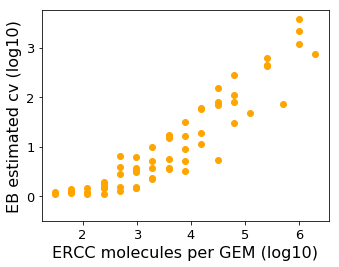

In [97]:
x_val = np.log10(ercc_lvl+1)
# y_val = np.log10(M_ml[0]+1)
temp = np.array(data.X.mean(axis=0)).reshape([-1])
y_val = np.log10(temp+1)
plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='orange')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# plt.plot([x_min, x_max], [-x_min, -x_max], linestyle='--')
# plt.xlim([x_min, x_max])
plt.ylim([-0.5,y_max])
# plt.annotate('y = %0.2fx - %0.2f'%(a, abs(b)), [x_max - 2.5, -2], fontsize=16)
plt.xlabel('ERCC molecules per GEM (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
# plt.savefig(output_folder+'/ERCC.png')
# plt.savefig(output_folder+'/ERCC.pdf')
plt.show()

In [94]:
x_val

array([5.99708087, 4.79296745, 5.69605131, 4.79296745, 1.78976553,
       2.38650767, 3.28803428, 4.19092844, 3.58895239, 2.38650767,
       2.08725754, 2.686645  , 3.88992643, 2.38650767, 1.78976553,
       4.49194445, 4.49194445, 3.88992643, 5.39502219, 3.28803428,
       2.98722797, 2.08725754, 2.98722797, 4.19092844, 3.58895239,
       2.38650767, 2.08725754, 3.58895239, 1.78976553, 5.99708087,
       4.19092844, 3.28803428, 3.58895239, 3.28803428, 2.686645  ,
       4.19092844, 3.88992643, 5.99708087, 2.98722797, 4.79296745,
       4.49194445, 3.88992643, 5.39502219, 4.49194445, 1.78976553,
       2.98722797, 6.29811065, 3.88992643, 5.09399395, 1.78976553,
       2.38650767, 3.28803428, 4.79296745, 2.98722797, 2.38650767,
       2.686645  , 2.686645  , 1.49572621, 2.686645  , 3.58895239,
       2.98722797, 3.58895239, 1.49572621, 2.98722797, 5.39502219])

In [95]:
ercc_lvl

array([9.93300000e+05, 6.20812500e+04, 4.96650000e+05, 6.20812500e+04,
       6.06262205e+01, 2.42504883e+02, 1.94003906e+03, 1.55203125e+04,
       3.88007812e+03, 2.42504883e+02, 1.21252442e+02, 4.85009766e+02,
       7.76015625e+03, 2.42504883e+02, 6.06262205e+01, 3.10406250e+04,
       3.10406250e+04, 7.76015625e+03, 2.48325000e+05, 1.94003906e+03,
       9.70019531e+02, 1.21252442e+02, 9.70019531e+02, 1.55203125e+04,
       3.88007812e+03, 2.42504883e+02, 1.21252442e+02, 3.88007812e+03,
       6.06262205e+01, 9.93300000e+05, 1.55203125e+04, 1.94003906e+03,
       3.88007812e+03, 1.94003906e+03, 4.85009766e+02, 1.55203125e+04,
       7.76015625e+03, 9.93300000e+05, 9.70019531e+02, 6.20812500e+04,
       3.10406250e+04, 7.76015625e+03, 2.48325000e+05, 3.10406250e+04,
       6.06262205e+01, 9.70019531e+02, 1.98660000e+06, 7.76015625e+03,
       1.24162500e+05, 6.06262205e+01, 2.42504883e+02, 1.94003906e+03,
       6.20812500e+04, 9.70019531e+02, 2.42504883e+02, 4.85009766e+02,
      

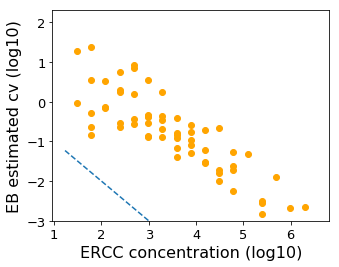

In [86]:
x_val = np.log10(ercc_lvl).reshape([-1,1])
y_val = 2*np.log10(cv_dd)
# x_val = x_val[y_val>-10]
plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='orange')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# plt.plot([x_min, x_max], [x_min*a+b,x_max*a+b], linestyle='--')
# plt.plot([x_min, x_max], [x_min, x_max], linestyle='--')
plt.plot([x_min, x_max], [-x_min, -x_max], linestyle='--')
# plt.xlim([x_min, x_max])
plt.ylim([-3,y_max])
# plt.annotate('y = %0.2fx - %0.2f'%(a, abs(b)), [x_max - 2.5, -2], fontsize=16)
plt.xlabel('ERCC concentration (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
# plt.savefig(output_folder+'/ERCC.png')
# plt.savefig(output_folder+'/ERCC.pdf')
plt.show()

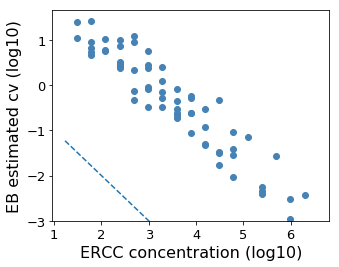

In [88]:
x_val = np.log10(ercc_lvl).reshape([-1,1])
y_val = 2*np.log10(cv_ml)
# x_val = x_val[y_val>-10]

plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='steelblue')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# plt.plot([x_min, x_max], [x_min*a+b,x_max*a+b], linestyle='--')
# plt.plot([x_min, x_max], [x_min, x_max], linestyle='--')
plt.plot([x_min, x_max], [-x_min, -x_max], linestyle='--')
# plt.xlim([x_min, x_max])
plt.ylim([-3,y_max])
# plt.annotate('y = %0.2fx - %0.2f'%(a, abs(b)), [x_max - 2.5, -2], fontsize=16)
plt.xlabel('ERCC concentration (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
# plt.savefig(output_folder+'/ERCC.png')
plt.savefig(output_folder+'/ERCC.pdf')
plt.show()

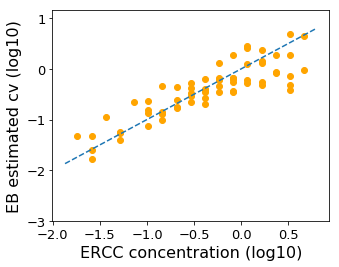

In [73]:
x_val = np.log10(ercc_cv).reshape([-1,1])
y_val = np.log10(cv_dd)
x_val = x_val[y_val>-10]
# y_val = y_val[y_val>-10]
# reg = LinearRegression().fit(x_val, y_val)
# a = reg.coef_[0]
# b = reg.intercept_

plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='orange')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# plt.plot([x_min, x_max], [x_min*a+b,x_max*a+b], linestyle='--')
plt.plot([x_min, x_max], [x_min, x_max], linestyle='--')
# plt.xlim([x_min, x_max])
plt.ylim([-3,y_max])
# plt.annotate('y = %0.2fx - %0.2f'%(a, abs(b)), [x_max - 2.5, -2], fontsize=16)
plt.xlabel('ERCC concentration (log10)', fontsize=16)
plt.ylabel('EB estimated cv (log10)', fontsize=16)
plt.tight_layout()
# plt.savefig(output_folder+'/ERCC.png')
plt.savefig(output_folder+'/ERCC.pdf')
plt.show()

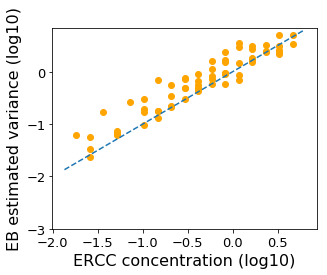

In [72]:
x_val = np.log10(ercc_cv).reshape([-1,1])
y_val = np.log10(cv_ml)
x_val = x_val[y_val>-10]
# y_val = y_val[y_val>-10]
# reg = LinearRegression().fit(x_val, y_val)
# a = reg.coef_[0]
# b = reg.intercept_

plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='orange')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.plot([x_min, x_max], [x_min, x_max], linestyle='--')

# plt.plot([x_min, x_max], [x_min*a+b,x_max*a+b], linestyle='--')
# plt.xlim([x_min, x_max])
plt.ylim([-3,y_max])
# plt.annotate('y = %0.2fx - %0.2f'%(a, abs(b)), [x_max - 2.5, -2], fontsize=16)
plt.xlabel('ERCC concentration (log10)', fontsize=16)
plt.ylabel('Drop-seq estimated variance (log10)', fontsize=16)
plt.tight_layout()
# plt.savefig(output_folder+'/ERCC.png')
plt.savefig(output_folder+'/ERCC.pdf')
plt.show()

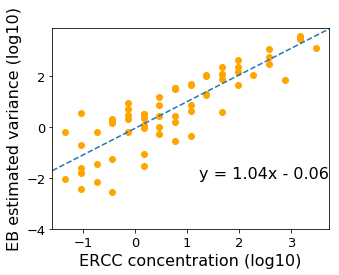

In [64]:
x_val = np.log10(ercc_lvl).reshape([-1,1])
y_val = np.log10(var_dd)
x_val = x_val[y_val>-10]
y_val = y_val[y_val>-10]
reg = LinearRegression().fit(x_val, y_val)
a = reg.coef_[0]
b = reg.intercept_

plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='orange')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.plot([x_min, x_max], [x_min*a+b,x_max*a+b], linestyle='--')
plt.xlim([x_min, x_max])
plt.ylim([-4,y_max])
plt.annotate('y = %0.2fx - %0.2f'%(a, abs(b)), [x_max - 2.5, -2], fontsize=16)
plt.xlabel('ERCC concentration (log10)', fontsize=16)
plt.ylabel('EB estimated variance (log10)', fontsize=16)
plt.tight_layout()
plt.savefig(output_folder+'/ERCC.png')
plt.savefig(output_folder+'/ERCC.pdf')
plt.show()

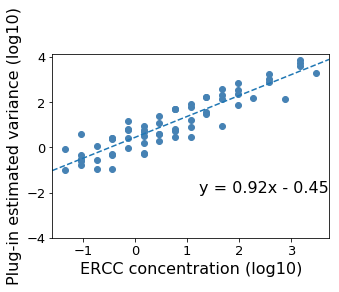

In [63]:
x_val = np.log10(ercc_lvl).reshape([-1,1])
y_val = np.log10(var_ml)
x_val = x_val[y_val>-10]
y_val = y_val[y_val>-10]
reg = LinearRegression().fit(x_val, y_val)
a = reg.coef_[0]
b = reg.intercept_

plt.figure(figsize=[5,4])
plt.scatter(x_val, y_val, color='steelblue')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.plot([x_min, x_max], [x_min*a+b,x_max*a+b], linestyle='--')
plt.xlim([x_min, x_max])
plt.ylim([-4,y_max])
plt.annotate('y = %0.2fx - %0.2f'%(a, abs(b)), [x_max - 2.5, -2], fontsize=16)
plt.xlabel('ERCC concentration (log10)', fontsize=16)
plt.ylabel('Plug-in estimated variance (log10)', fontsize=16)
plt.tight_layout()
plt.savefig(output_folder+'/ERCC_ml.png')
plt.savefig(output_folder+'/ERCC_ml.pdf')
plt.show()